In [1]:

!apt updateapt update
!pip install mdbtools-dev
!apt-get install mdbtools
!pip install pandas pyodbc
import warnings
warnings.filterwarnings('ignore')

E: Invalid operation updateapt
ERROR: Could not find a version that satisfies the requirement mdbtools-dev (from versions: none)
ERROR: No matching distribution found for mdbtools-dev
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libmdb3 libmdbsql3
Suggested packages:
  bash-completion
The following NEW packages will be installed:
  libmdb3 libmdbsql3 mdbtools
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 136 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmdb3 amd64 1.0.0+dfsg-1 [68.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmdbsql3 amd64 1.0.0+dfsg-1 [18.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mdbtools amd64 1.0.0+dfsg-1 [48.3 kB]
Fetched 136 kB in 1s (192 kB/s)
Selecting previously unselected package 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Dev/py2/')
import numpy as np

import pandas as pd
from google.colab import files
import os
import subprocess
from io import StringIO  # StringIOを正しくインポート
import model.utility.k_analysis_util as k_a_util
from IPython.display import display

from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:

# 使用例
table_name = 'StatisticsVariables'  # テーブル名を指定

file_list = [f'kjdb_prediction_cache_{year}.accdb' for year in range(2000, 2025)]
years = range(2000, 2025)

k_a_util.prepare_pd_on_notebook()
print(len(file_list))

dict_statistics={}
for y in years:
  filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_prediction_cache_{y}.accdb'
  df_summary = k_a_util.read_table(filepath, table_name)
  columns_to_drop = ['sv_program_id','sv_horse_id', 'upd']
  df = df_summary.drop(columns=columns_to_drop)
  dict_statistics[y] = df

25


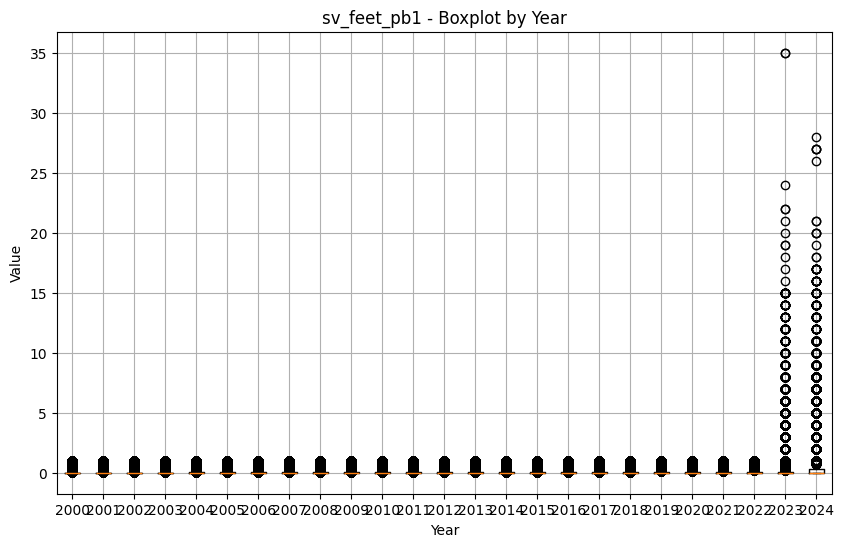

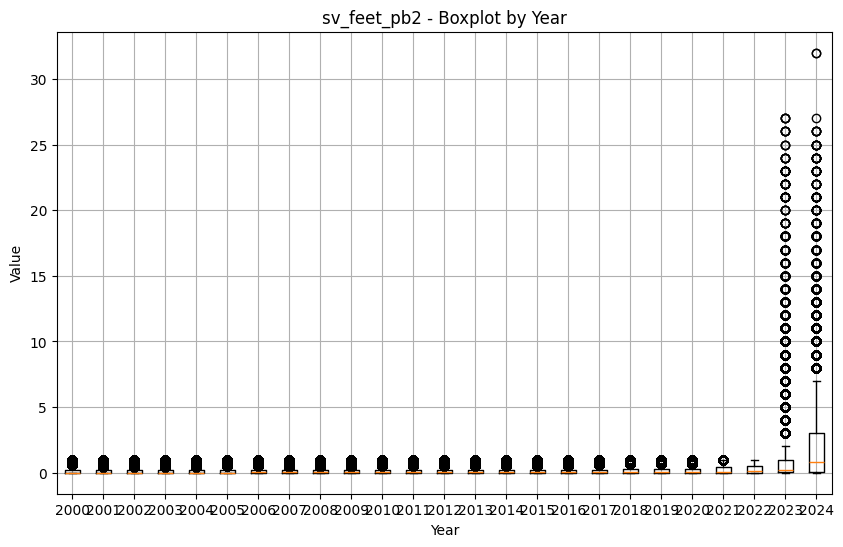

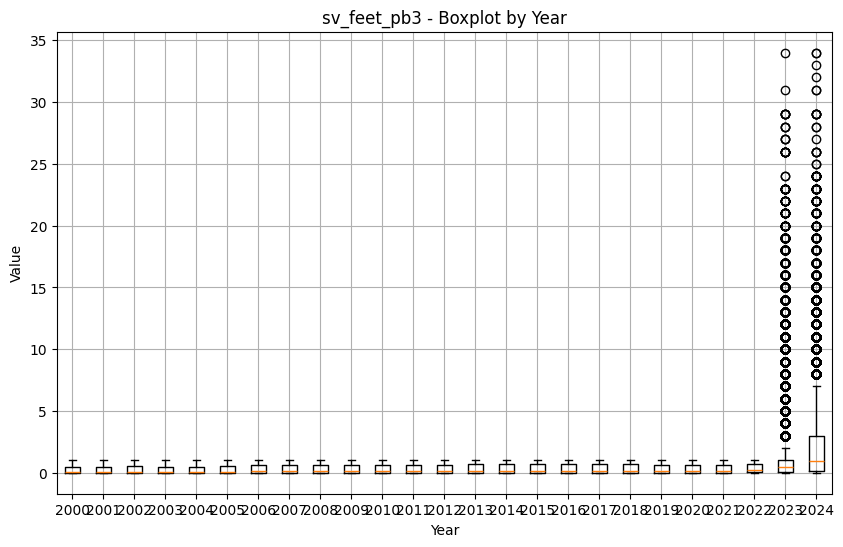

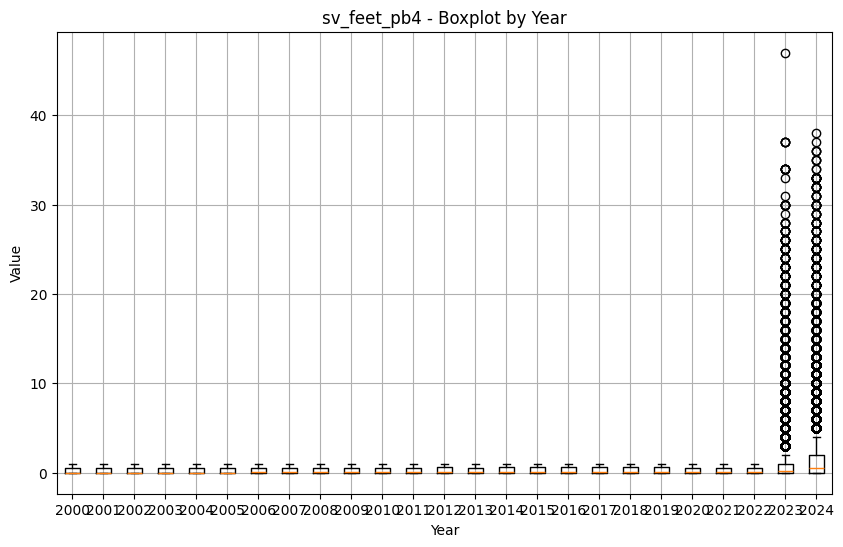

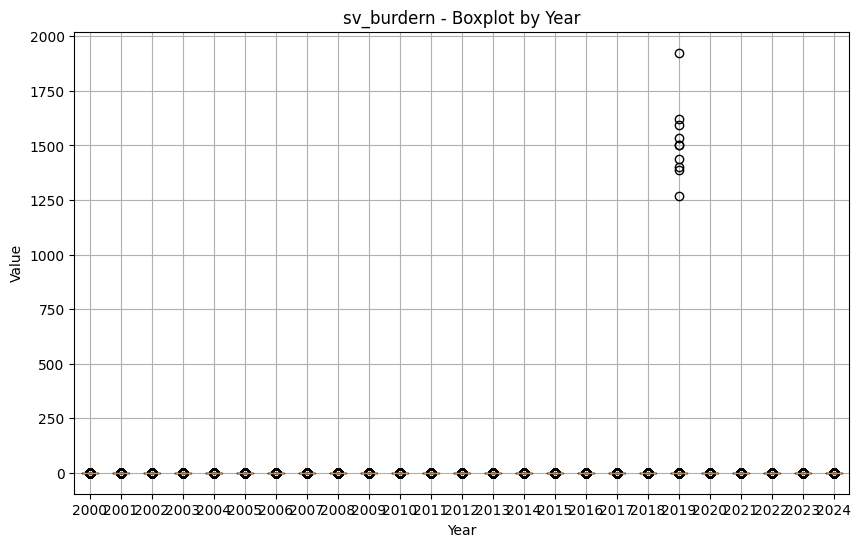

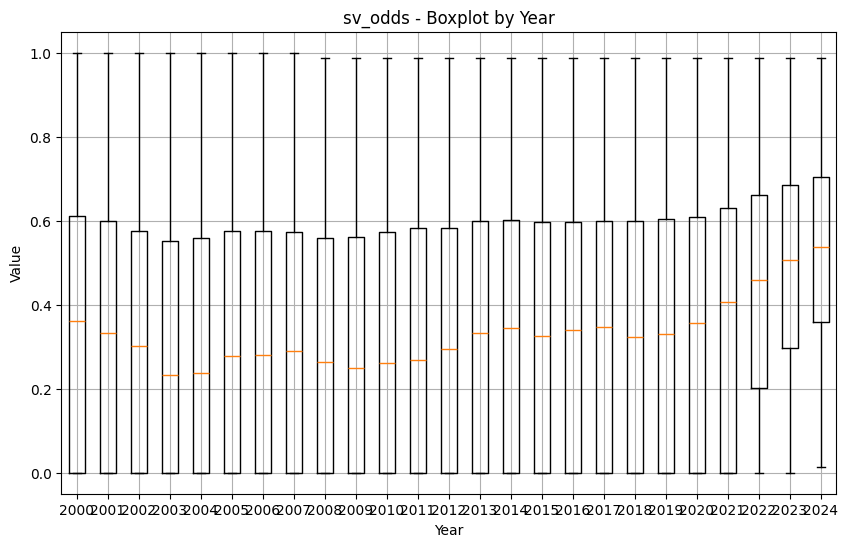

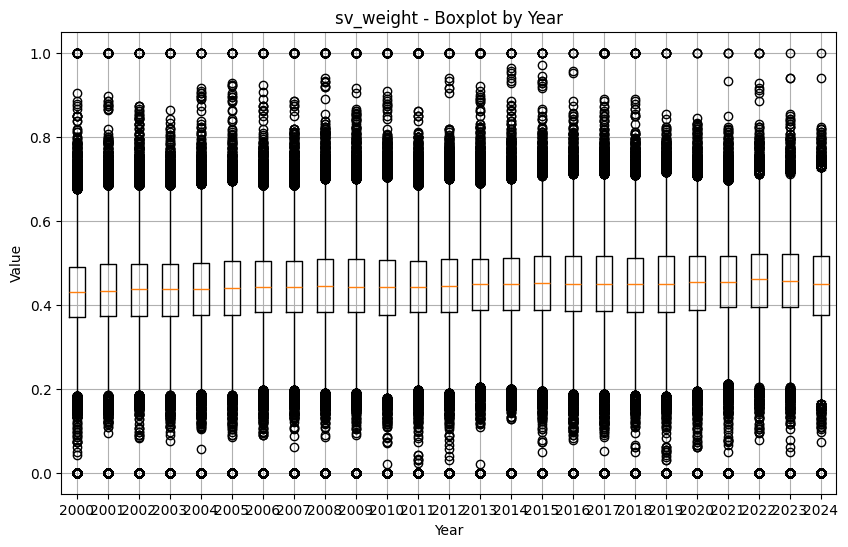

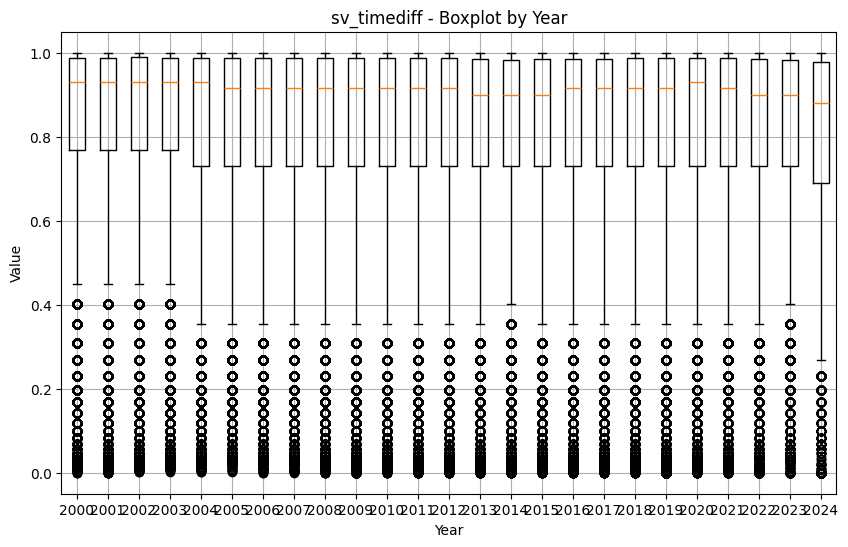

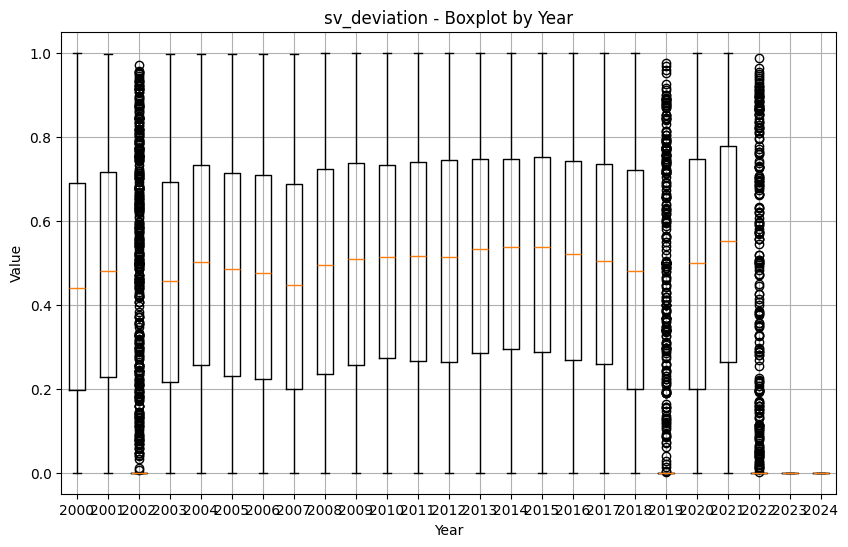

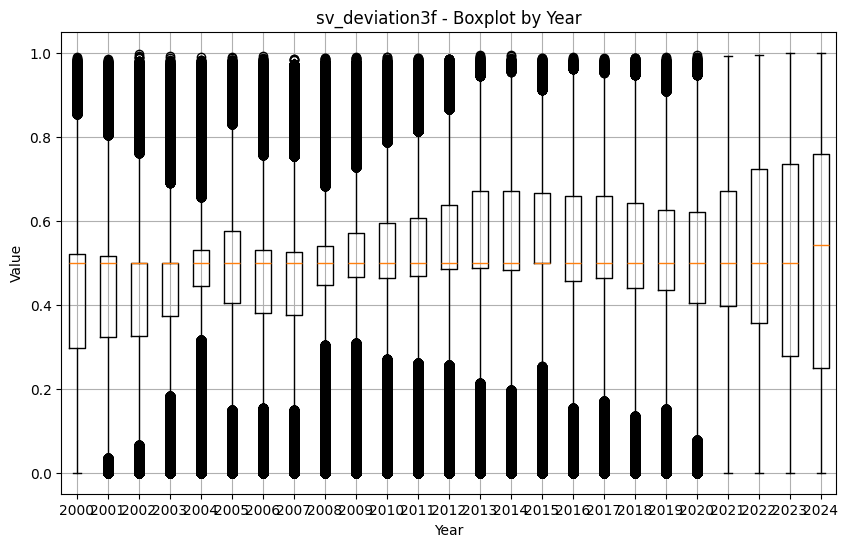

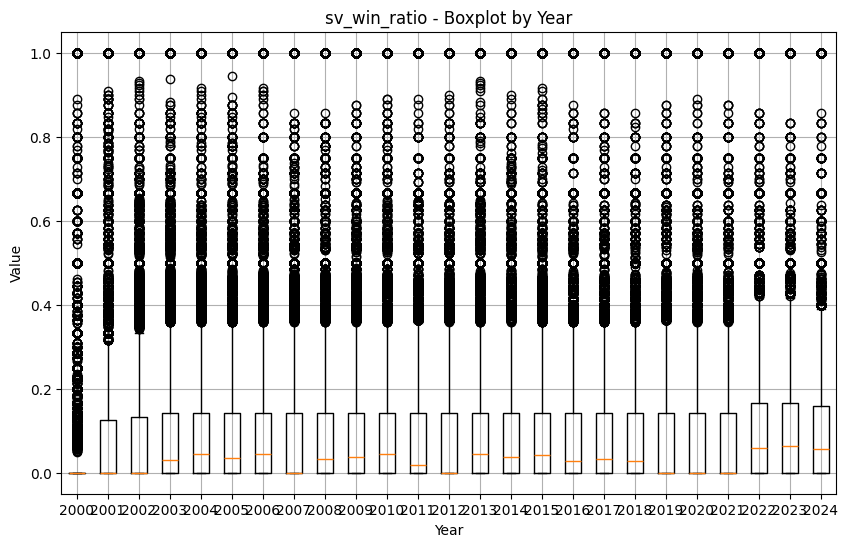

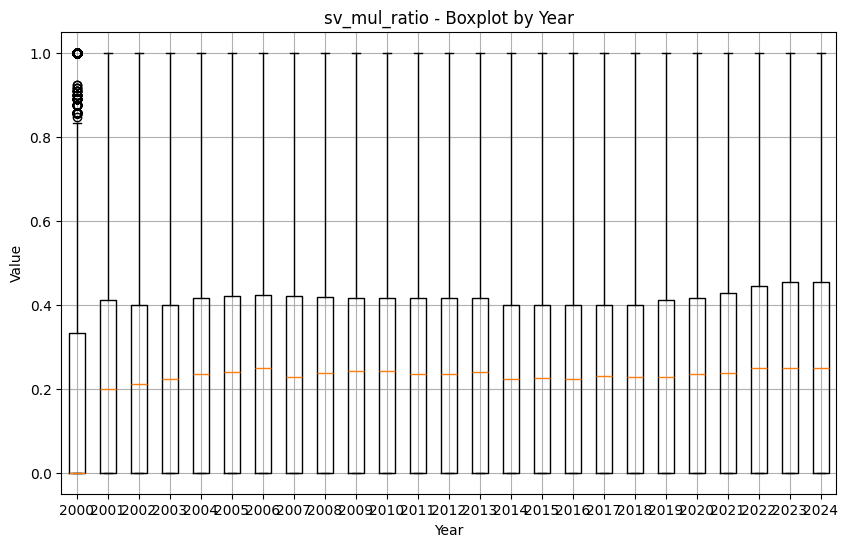

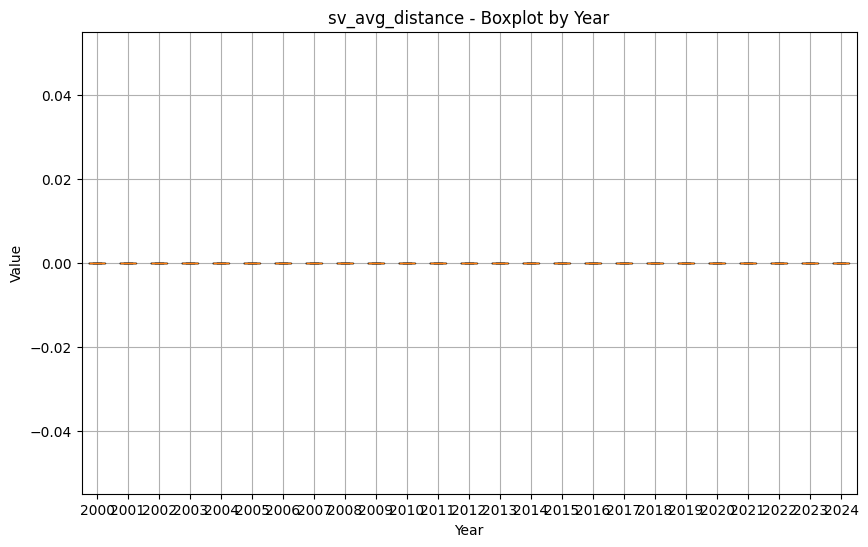

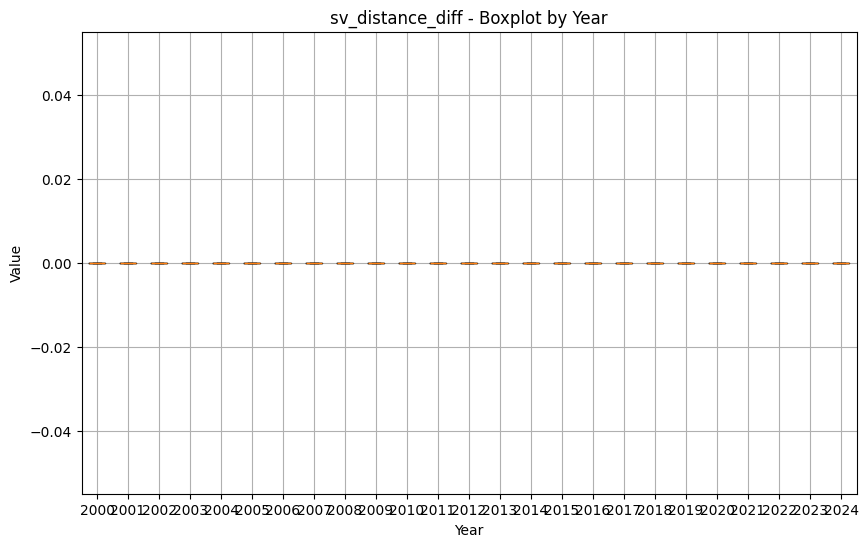

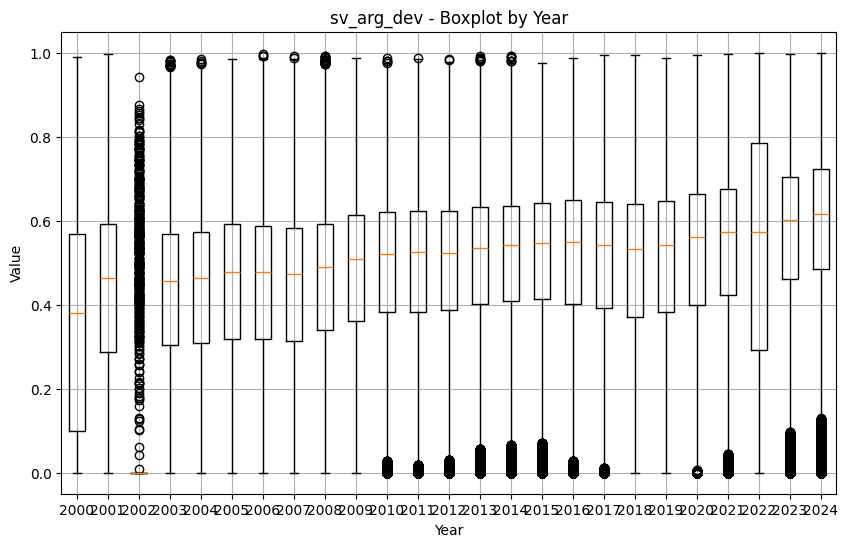

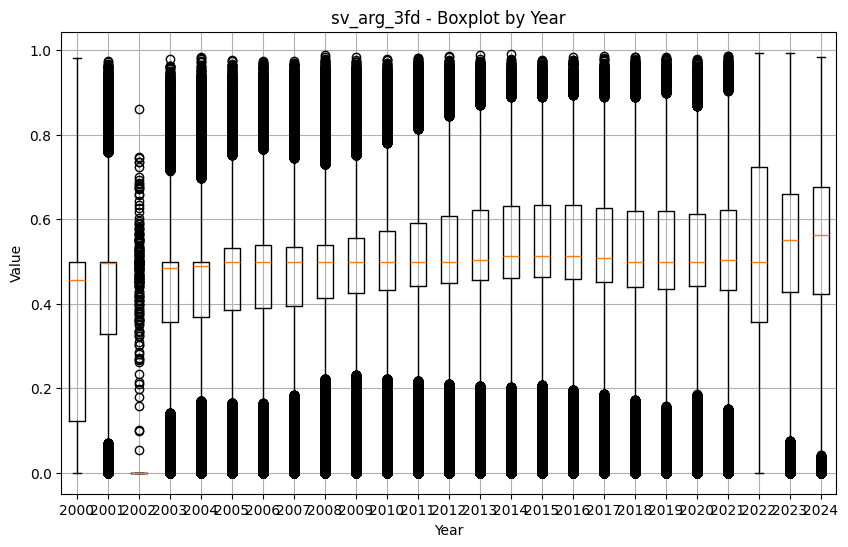

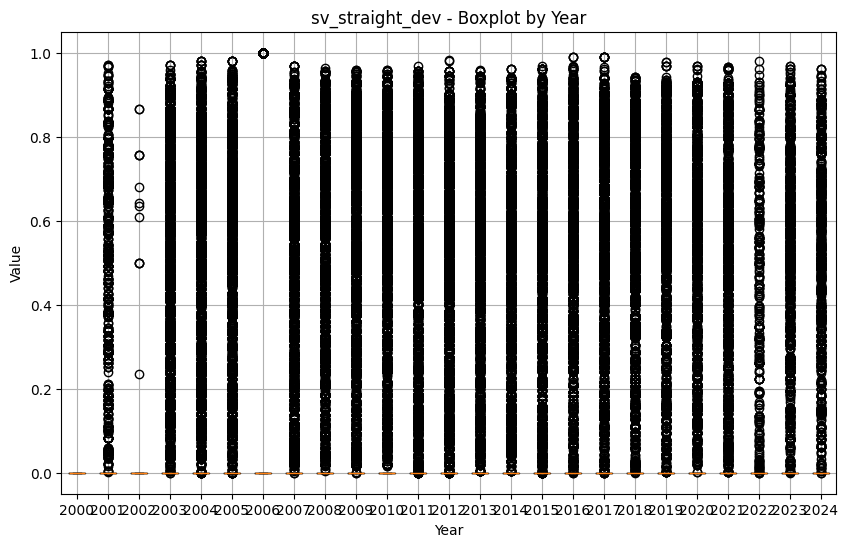

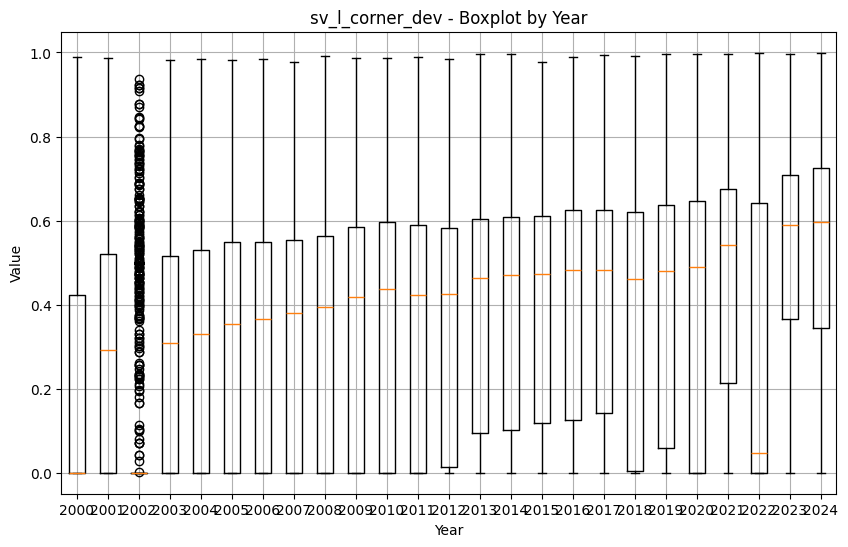

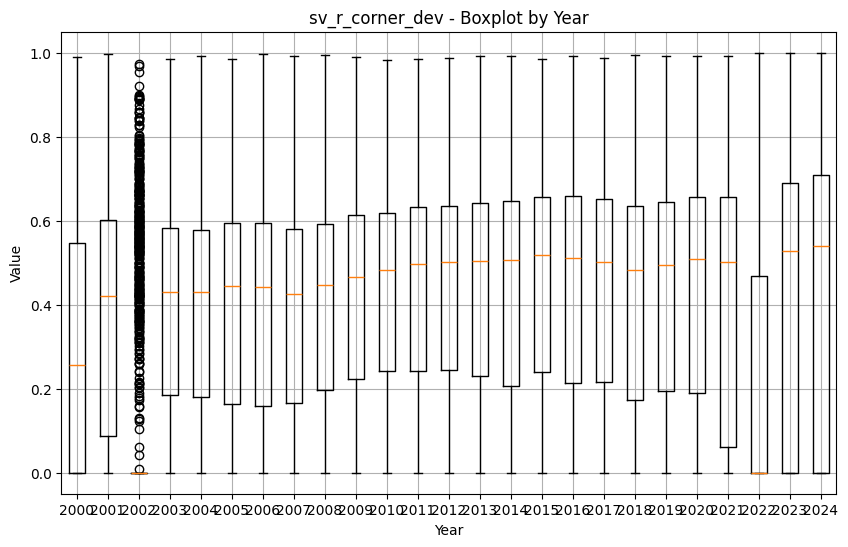

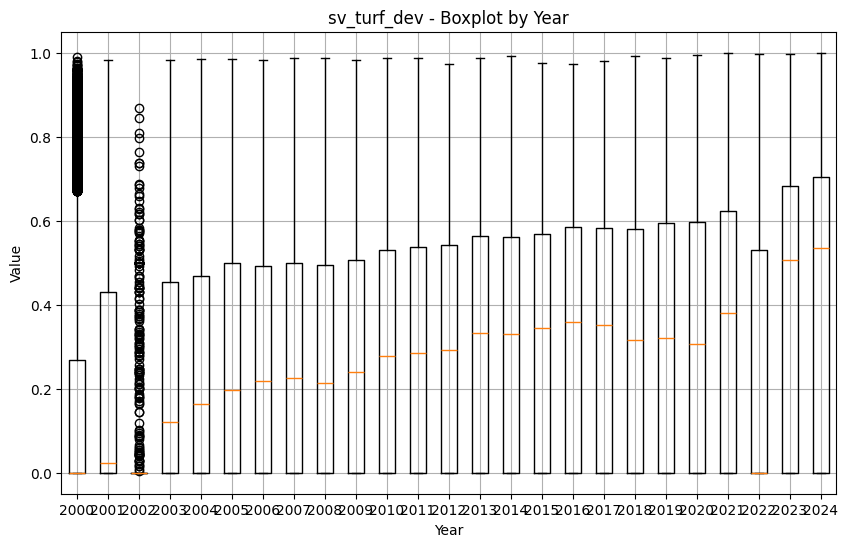

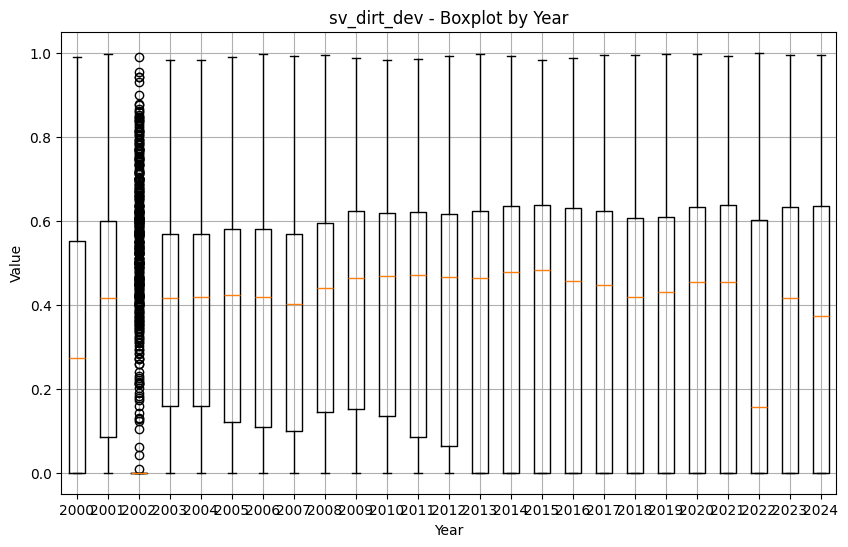

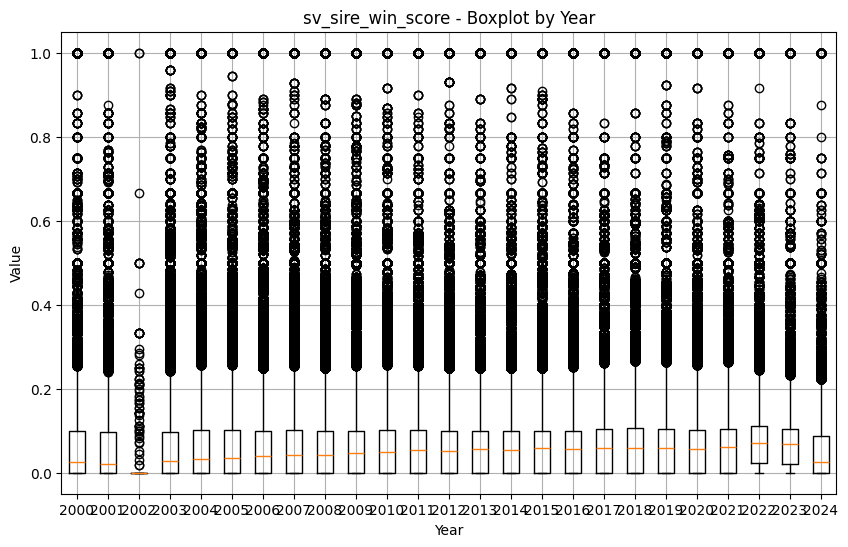

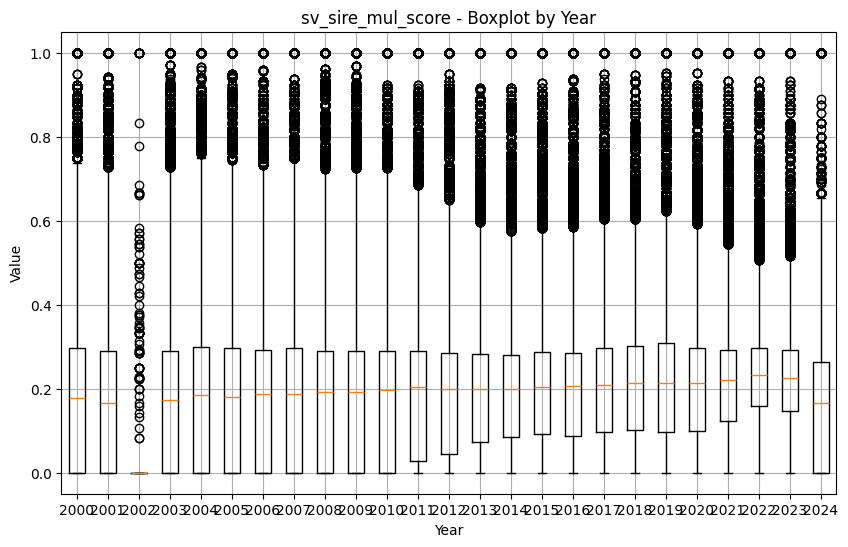

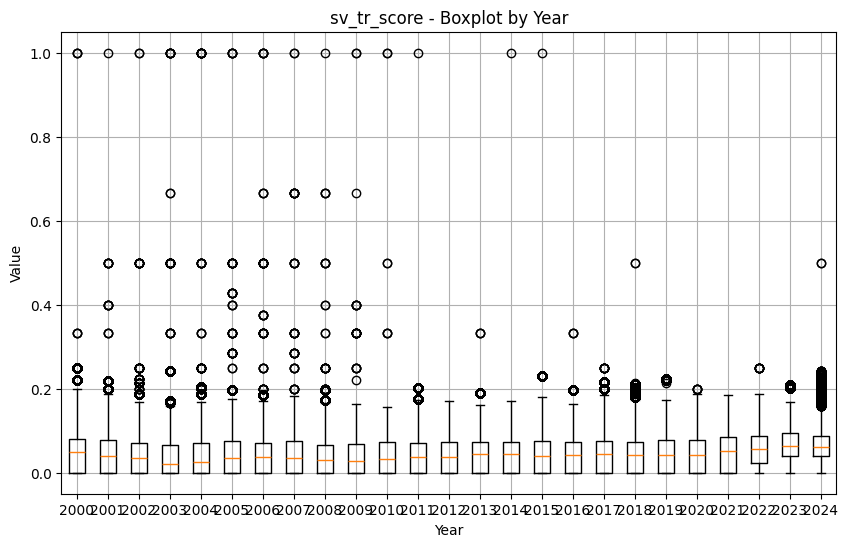

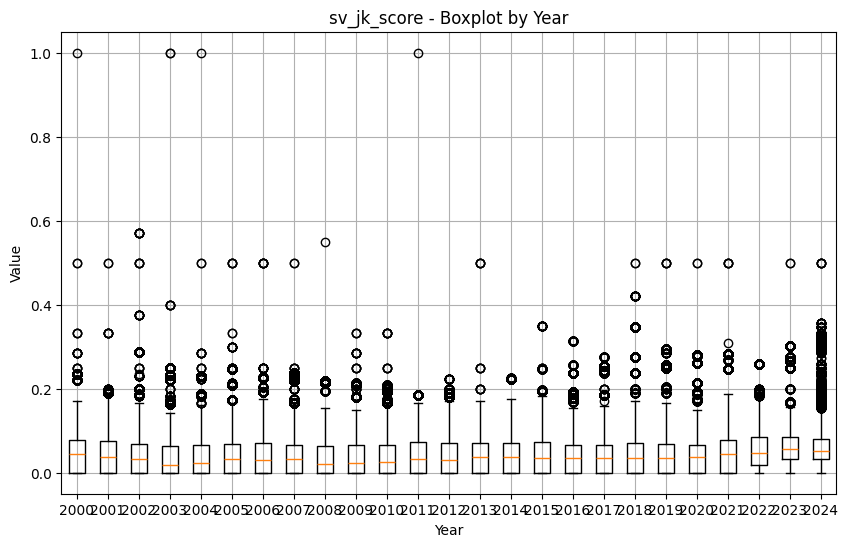

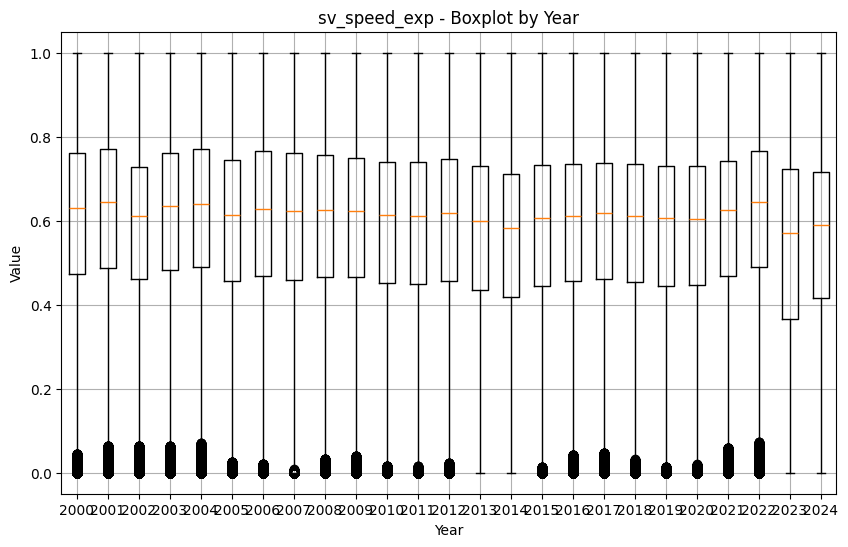

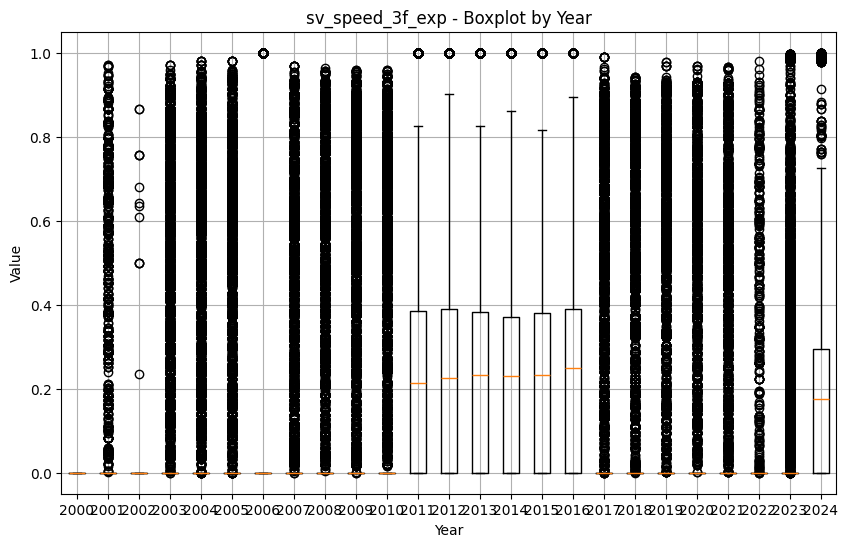

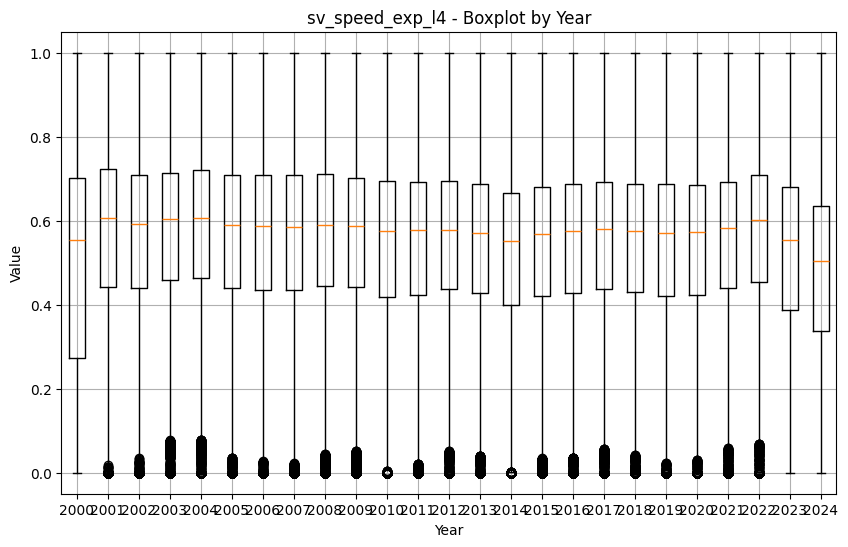

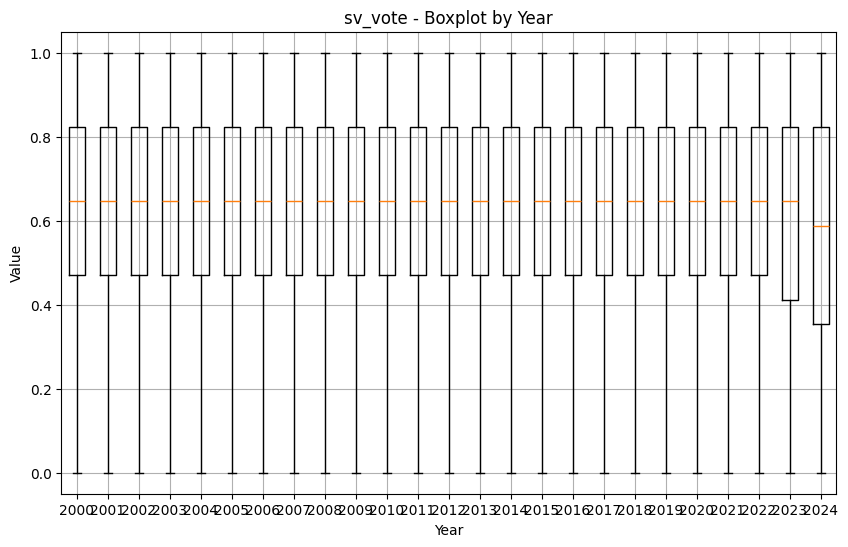

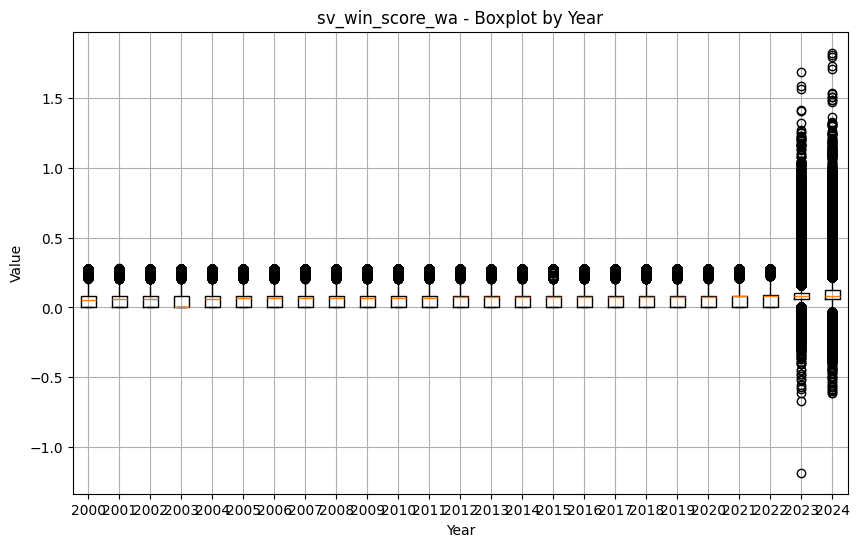

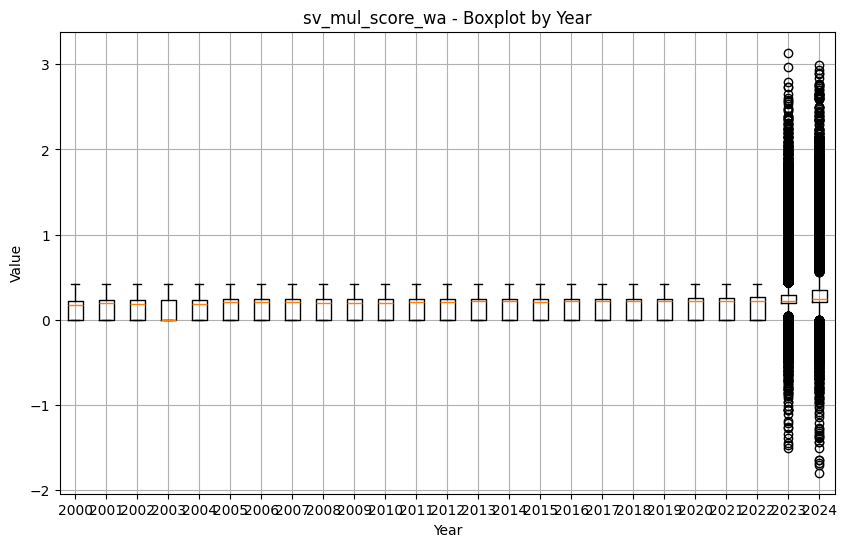

In [13]:
# 箱ひげ図の作成 (グラフの行数、列数、解像度を適宜変更)
#k_a_util.plot_boxplots(dict_statistics, rows=2, cols=4, dpi=72)

k_a_util.plot_boxplots_by_year(dict_statistics)